In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import requests
import time
from time import gmtime, strftime
from scipy.stats import linregress
import json
from pprint import pprint
import csv
import chart_studio.plotly as py
import plotly.express as px

# Reading Netflix file
netflix_titles_path = "Output/TMDB_OMDB.CSV"

# Read the mouse data and the study results
netflix_titles_temp = pd.read_csv(netflix_titles_path)
netflix_titles_temp.replace('', np.nan, inplace=True) 
fill_values = {'Movie ID':0,'director': 'Director Not Available', 'Cast': 'Cast Not Available', 'country': 'Country Not Available', 'listed_in': 'Catagory not available'}
netflix_titles_temp.fillna(value=fill_values, inplace=True)
netflix_titles_temp.drop(columns=["Unnamed: 0","Unnamed: 0.1"],inplace=True)
netflix_titles = netflix_titles.loc[netflix_titles['Movie ID'] != 0, :]
netflix_titles.dtypes

show_id                     int64
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added                 object
Netflix release year        int64
rating                     object
duration                   object
listed_in                  object
description                object
IMDB rating               float64
Rotten Tomatoes rating    float64
Award                      object
Released Date              object
IMDB rating group          object
Title                      object
Budget                      int64
Movie ID                  float64
Revenue                     int64
dtype: object

In [124]:
netflix_titles2

,show_id,type,title,director,cast,country,date_added,Netflix release year,rating,duration,...,description,IMDB rating,Rotten Tomatoes rating,Award,Released Date,IMDB rating group,Title,Budget,Movie ID,Revenue
2,80163890,TV Show,Apaches,Director Not Available,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,...,A young journalist is forced into a life of cr...,5.0,31.0,2 nominations.,14 Aug 2013,5%,Apaches,0,164337.0,0
3,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,"In a dystopian future, an insurance adjuster f...",6.0,29.0,6 nominations.,17 Oct 2014,6%,Automata,7000000,262543.0,0
5,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,A struggling couple can't believe their luck w...,5.0,12.0,NaN,21 Aug 2015,5%,Good People,0,262338.0,0
6,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,Country Not Available,"September 8, 2017",2017,TV-MA,78 min,...,Comedian and celebrity impersonator Joaquín Re...,0.0,0.0,NaN,NaN,NaN,Joaquín Reyes: Una y no más,0,474599.0,0
7,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,"When beer magnate Alfred ""Freddy"" Heineken is ...",6.0,19.0,NaN,06 Mar 2015,6%,Kidnapping Mr. Heineken,0,228968.0,2633527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,70227189,TV Show,Lost Girl,Director Not Available,"Anna Silk, Kris Holden-Ried, Ksenia Solo, Rich...",Canada,"April 17, 2016",2015,TV-14,5 Seasons,...,Discovering she's a succubus who sustains hers...,7.0,0.0,2 wins & 13 nominations.,12 Sep 2010,7%,Lost Girl,0,240468.0,0
4820,70272742,TV Show,Justin Time,Director Not Available,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,...,"In Justin's dreams, he and his imaginary frien...",4.0,20.0,NaN,NaN,4%,Justin Time,0,34203.0,0
4822,70136122,TV Show,Weeds,Director Not Available,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,"April 1, 2014",2012,TV-MA,8 Seasons,...,A suburban mother starts selling marijuana to ...,7.0,0.0,Won 1 Golden Globe. Another 14 wins & 99 nomin...,07 Aug 2005,7%,Weeds,0,96333.0,0
4825,80005756,TV Show,The Adventures of Figaro Pho,Director Not Available,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,...,"Imagine your worst fears, then multiply them: ...",7.0,0.0,3 wins & 2 nominations.,31 Oct 2012,7%,The Adventures of Figaro Pho,0,464127.0,0


In [125]:
netflix_titles_countries = pd.DataFrame ({"Titles": netflix_titles["show_id"],
                                          "Country": netflix_titles["country"]}) 
netflix_titles_listed_in = pd.DataFrame ({"Titles": netflix_titles["show_id"],
                                          "ListedIn": netflix_titles["listed_in"]})
netflix_titles_directors = pd.DataFrame ({"Titles": netflix_titles["show_id"],
                                          "Director": netflix_titles["director"]})
netflix_titles_casts = pd.DataFrame ({"Titles": netflix_titles["show_id"],
                                          "Cast": netflix_titles["cast"]})

In [126]:
netflix_titles_countries.Country = netflix_titles_countries.Country.str.split(', ')
netflix_titles_listed_in.ListedIn = netflix_titles_listed_in.ListedIn.str.split(', ')
netflix_titles_directors.Director = netflix_titles_directors.Director.str.split(', ')
netflix_titles_casts.Cast = netflix_titles_casts.Cast.str.split(', ')

In [127]:
netflix_titles_countries = netflix_titles_countries.explode('Country').reset_index(drop=True)
netflix_titles_listed_in = netflix_titles_listed_in.explode('ListedIn').reset_index(drop=True)
netflix_titles_directors = netflix_titles_directors.explode('Director').reset_index(drop=True)
netflix_titles_casts = netflix_titles_casts.explode('Cast').reset_index(drop=True)

In [131]:
netflix_titles_countries.head (30)

,Titles,Country
0,80163890,Spain
1,70304989,Bulgaria
2,70304989,United States
3,70304989,Spain
4,70304989,Canada
5,70304990,United States
6,70304990,United Kingdom
7,70304990,Denmark
8,70304990,Sweden
9,80169755,Country Not Available


In [132]:
netflix_titles_listed_in.head (30)

,Titles,ListedIn
0,80163890,Crime TV Shows
1,80163890,International TV Shows
2,80163890,Spanish-Language TV Shows
3,70304989,International Movies
4,70304989,Sci-Fi & Fantasy
5,70304989,Thrillers
6,70304990,Action & Adventure
7,70304990,Thrillers
8,80169755,Stand-Up Comedy
9,70299204,Action & Adventure


In [133]:
netflix_titles_directors.head(30)

,Titles,Director
0,80163890,Director Not Available
1,70304989,Gabe Ibáñez
2,70304990,Henrik Ruben Genz
3,80169755,José Miguel Contreras
4,70299204,Daniel Alfredson
5,80060297,Tom O'Brien
6,80046728,Antoine Bardou-Jacquet
7,80046727,Mitch Dickman
8,70304988,Brad Anderson
9,80057700,Austin Stark


In [134]:
netflix_titles_casts.head(30)

,Titles,Cast
0,80163890,Alberto Ammann
1,80163890,Eloy Azorín
2,80163890,Verónica Echegui
3,80163890,Lucía Jiménez
4,80163890,Claudia Traisac
5,70304989,Antonio Banderas
6,70304989,Dylan McDermott
7,70304989,Melanie Griffith
8,70304989,Birgitte Hjort Sørensen
9,70304989,Robert Forster


In [135]:
Countries_path = 'data\countries.csv'
lats, lons = [], []

Countries = pd.read_csv(Countries_path)
lats = [float(i) for i in Countries.latitude.tolist()]
lons = [float(i) for i in Countries.longitude.tolist()]
Countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [136]:
netflix_titles_countries_count = netflix_titles_countries.groupby("Country").count()

netflix_titles_countries_count.head()
netflix_titles_countries_count_merged_position = netflix_titles_countries_count.merge (Countries, left_on='Country', right_on='name')
netflix_titles_countries_count_merged_names = netflix_titles_countries_count_merged_position.name.tolist()

In [138]:
m = interp1d ([1,max(list1)],[1,20])
circle_radius = m(list1)
"""
list1 = netflix_titles_countries_count.Titles.tolist()

list2 = []

#list2 = [int(j) / max(list1[i]) for j,i in zip(list1, range(len(list1)))]
max_value = max(list1)
print (list1)
#list2.remove(max_value)

for i in range(len(list1)):
    if list1[i] == max_value:
        list1[i] = 100
        
        

list2 = [(int(number) // 100 * 10) for number in list1]

#print(max(list2))
"""
typelist = ['open-street-map','white-bg','carto-positron','carto-darkmatter','stamen-terrain','stamen-watercolor','satellite-streets']

In [141]:
"""for i in typelist:
        print (i)
        fig = px.density_mapbox (netflix_titles_countries_count_merged_position, lat='latitude', lon='longitude', radius=circle_radius,
                                zoom=1, mapbox_style=i)
        fig.show ()"""

"for i in typelist:\n        print (i)\n        fig = px.density_mapbox (netflix_titles_countries_count_merged_position, lat='latitude', lon='longitude', radius=circle_radius,\n                                zoom=1, mapbox_style=i)\n        fig.show ()"

In [142]:
fig = px.density_mapbox (netflix_titles_countries_count_merged_position, lat='latitude', lon='longitude', radius=circle_radius,
                                zoom=1, mapbox_style='carto-positron', hover_data=['name','Titles'])
fig.show ()

In [157]:
netflix_genre_countries = netflix_titles_listed_in.merge (netflix_titles_countries, left_on='Titles',right_on='Titles')
netflix_groupby_genre_countries = netflix_genre_countries.groupby('ListedIn').count()
netflix_groupby_genre_countries

,Titles,Country
ListedIn,,
Action & Adventure,761,761
Anime Features,16,16
Anime Series,18,18
British TV Shows,76,76
Children & Family Movies,437,437
Classic & Cult TV,6,6
Classic Movies,93,93
Comedies,1162,1162
Crime TV Shows,119,119


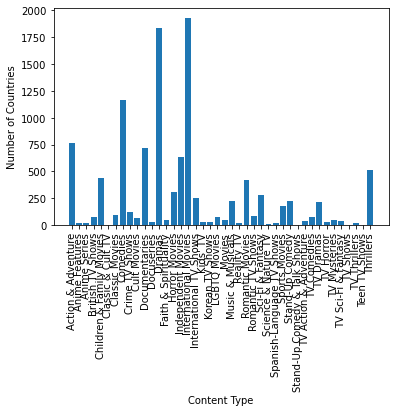

In [163]:
plt.ylabel("Number of Countries")
plt.xlabel("Content Type")
plt.bar(netflix_groupby_genre_countries.index, netflix_groupby_genre_countries['Country'])
plt.xticks(rotation=90)
plt.show()

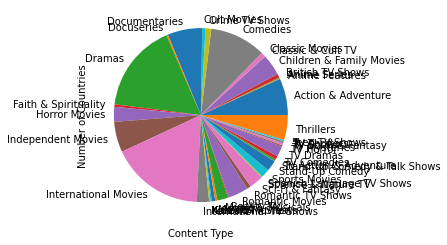

In [167]:
plt.ylabel("Number of Countries")
plt.xlabel("Content Type")
plt.pie(netflix_groupby_genre_countries['Country'], labels=netflix_groupby_genre_countries.index)
#plt.axis("equal")
plt.show()

In [179]:
netflix_directors_casts = netflix_titles_casts.merge (netflix_titles_directors, left_on='Titles',right_on='Titles')
netflix_groupby_directors_casts = netflix_directors_casts.groupby(['Cast','Director']).count()
netflix_groupby_directors_casts.sort_values ('Titles', ascending=False)

Titles
Cast             Director                 
Mihiresh Joshi   Gajendra Ahire         18
Raghuvir Yadav   Gajendra Ahire         18
Anjali Patil     Gajendra Ahire         18
Nagraj Manjule   Gajendra Ahire         18
Kadambari Kadam  Gajendra Ahire         18
...                                    ...
Harrison Ford    Kathryn Bigelow         1
                 Chris Renaud            1
Harris Yulin     Derek Cianfrance        1
Harris Dickinson Steve McLean            1
Şinasi Yurtsever Ali Taner Baltacı       1

[26818 rows x 1 columns]